# Testing Forward and Inverse Hankel Transform #

This is a simple demo to show how to compute the forward and inverse Hankel transform.

In [2]:
# Import libraries

import numpy as np                                                      # To define grid
from hankel import HankelTransform                                      # Transforms

from scipy.interpolate import InterpolatedUnivariateSpline as spline    # Spline

import matplotlib.pyplot as plt                                         # Plotting
%matplotlib inline

We define a function to use an example.  

This function is unbounded at $x=0$ and therefore causes problems with convergence at the origin. 

In [3]:
# Define grid

r = np.linspace(1e-2,1,1000)                       # Define a physical grid
k = np.logspace(-3,2,100)                          # Define a spectral grid

In [5]:
# Compute Forward Hankel transform

f    = lambda x : 1/x                              # Sample Function
h    = HankelTransform(nu=0,N=1000,h=0.005)        # Create the HankelTransform instance, order zero
hhat = h.transform(f,k,ret_err=False)              # Return the transform of f at k.

In [6]:
# Compute Inverse Hankel transform

hhat_sp = spline(k, hhat)                              # Define a spline to approximate transform
f_new = h.transform(hhat_sp, r, False, inverse=True)  # Compute the inverse transform

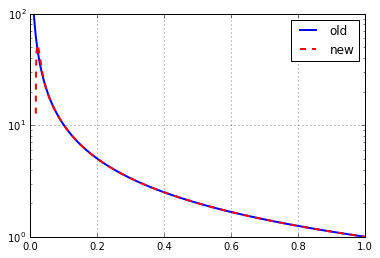

In [7]:
# Plot the original function and the transformed functions

plt.semilogy(r,f(r),'-b',  linewidth=2,label='old')
plt.semilogy(r,f_new,'--r',linewidth=2,label='new')
plt.grid('on')
plt.legend(loc='best')
plt.axis('on')
plt.show()